<a href="https://colab.research.google.com/github/ellenne/Regression/blob/master/10.%20WIP/Regression_Lesson02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Source:*<br/>
https://newonlinecourses.science.psu.edu/stat501/node/251/

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.utils import check_array
import warnings

In [0]:
# Definitions
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [3]:
skincancer_url = 'https://raw.githubusercontent.com/ellenne/Regression/master/05.%20In/skincancer.csv'
my_data = pd.read_csv(skincancer_url)
my_data.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.000,219,1,87.000
1,Arizona,34.500,160,0,112.000
2,Arkansas,35.000,170,0,92.500
3,California,37.500,182,1,119.500
4,Colorado,39.000,149,0,105.500


In [4]:
model = smf.ols(formula = 'Mort ~ Lat', data = my_data)
fitted = model.fit()
print (fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Mon, 06 May 2019   Prob (F-statistic):           3.31e-13
Time:                        15:54:33   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1894     23.812     16.344      0.0

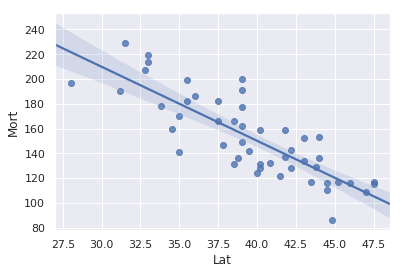

In [5]:
sns.set(color_codes=True)
ax = sns.regplot(x="Lat", y="Mort", data=my_data)

In [6]:
aov_table = sm.stats.anova_lm(fitted, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Lat,36464.200,1.000,99.797,0.000
Residual,17173.065,47.000,nan,nan


We are interested in understanding if there is a relationship between the population of all of the latidues and skin cancer mortality rates. <br/>
We want to know if $\beta_1$ is different from 0. We calculate the following statistics:<br/>
$b_1 \pm t_{(\alpha/2, n-2)} \times \left( \frac{\sqrt{MSE}}{\sqrt{\sum{(x_i - \bar{x_i})^2}}} \right)  $

<p>Looking at what Python gives us we can see that the predictor for `Lat` is -5.9776 (OLS Regression Result under coef). The estimated standard error for $b_1$ is 0.5984 (std err in the same section).<br/>
<p>By default, the test statistic is calculated assuming the user wants to test that the slope is 0. Dividing the estimated coefficient -5.9776 by the standard error 0.5984 we obtain the T statistic -9.99 (under t in the OLS).<br/>
  <p>The P-value is calculated assuming the alternative hypothesis is a "two-tailed, not-equal-to" hypothesis. Then it is calculated the probability that a t-random variable with n-2 = 47 degrees of freedom (see the aov_table below) would be larger than 9.99, and multiplying the probability by 2, Python reports that P is 0.000. This means that the P-value is less than 0.001 (the multiplication by 2 happens because it is a two-tailed test).<br/>
<p>Becuse the P-value is small (less than 0.001), we can reject the null hypothesis and conclude that $\beta_1$ does not equal 0. There is a sufficient evidence, at the $\alpha = 0.05$ level, to conclude that there is a linear relationship in the population between skin cancer mortality and latitude.<br/><br/>
 
Let's build now a 95% confidence interval for $\beta_1$


In [7]:
fitted.conf_int(0.05)   # 95% confidence interval

,0,1
Intercept,341.285,437.094
Lat,-7.181,-4.774


<p>We can be 95% confident that the population slope is between -7.2 and -4.8. That i, we can be 95% confident that for every additional one-degree increase in latitude, the mean skin cancer mortality rate decreases between 4.8 and 7.2 deaths per 10 million people.<br/>
  <p>Similar thing can be said for the intercept. In this case it is different from 0 therefore when x=0 the response it is different from 0. Not in all cases this scenario makes sense.<br/>
 
<p>  **Statistical inference conditions**<br/>
 The above confidence intervals for $\beta_0 and \beta_1$ can be used if the *LINE* assumptions hold - linearity, independence, normality and equal variance - 

In [8]:
leadcord_url = 'https://raw.githubusercontent.com/ellenne/Regression/master/05.%20In/leadcord.csv'
my_data_2 = pd.read_csv(leadcord_url)
my_data_2.head()

,Month,Year,Sold,Cord
0,3,1980,141,6.400
1,4,1980,166,6.100
2,5,1980,161,5.700
3,6,1980,170,6.900
4,7,1980,148,7.000


In [9]:
model_2 = smf.ols(formula = 'Cord ~ Sold', data = my_data_2)
fitted_2 = model_2.fit()
print(fitted_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cord   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9.952
Date:                Mon, 06 May 2019   Prob (F-statistic):            0.00830
Time:                        15:54:33   Log-Likelihood:                -12.007
No. Observations:                  14   AIC:                             28.01
Df Residuals:                      12   BIC:                             29.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1082      0.609      6.748      0.0

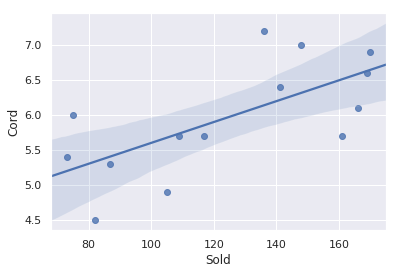

In [10]:
ax = sns.regplot(x="Sold", y="Cord", data=my_data_2)

In [11]:
aov_table_2 = sm.stats.anova_lm(fitted_2, typ=2)
aov_table_2

,sum_sq,df,F,PR(>F)
Sold,3.778,1.000,9.952,0.008
Residual,4.556,12.000,nan,nan


<p>Python reports that the P-value for testing $H_0:\beta_1=0$ is 0.008. Therefore, since the test statistic is positive, the P.value for testing $H_0:\beta_1=0$ against the alternative hypothesis $H_A:\beta_1>0$ is  $0.008 \div 2 = 0.004$. The P-value is less than 0.05. There is sufficient statistical evidence, at the 0.05 level, to conclude that $\beta_1>0$ <br/>
  <p> If we want to build the confidence interval at 95% for $\beta_1$ we need to look up the tables of the t distribution (Python will do that for us, but we need to know what is taken into consideration). So we see that the degrees of freedom for the residuals are 12, then we want to build a 95% confidence interval so 5% from 100% and we use the two-tail so 5% / 2 = 2.5% = 0.025 so we will look up t(12, 0.025) = 2.1788. Python gives us directly the confidence interval like that:

In [12]:
fitted_2.conf_int(0.05)

,0,1
Intercept,2.782,5.435
Sold,0.005,0.025


The researchers can be 95% confident that the mean lead concentrations in umbilical-cord blood of Massachussetts babies increases between 0.0046 and 0.0252 $\mu l/dl$for every one-metric ton increase in monthly gasoline lead sales in Massachusetts. It is up to the researchers to debate whether or not this is a meaningful increase.

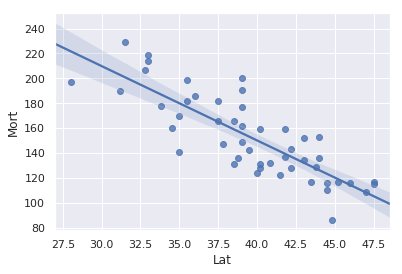

In [13]:
sns.set(color_codes=True)
ax = sns.regplot(x="Lat", y="Mort", data=my_data)

In [14]:
fitted.ess, fitted.ssr, fitted.ess + fitted.ssr
ESS = fitted.ess # Sum of Squares of the Regression
SSR = fitted.ssr # Error sum of squares
SST = SSR + ESS  # Total sum of squares
ESS, SSR, SST

(36464.20020300049, 17173.065103121953, 53637.26530612244)

If there is a linear relationship between mortality and latitude, the estimated regression line should be "far" from the no relationship line (that is $y=\bar{y}$ ).<br/>
In order to evaluate this condition let's look at the sum of squares:<br/>
$\displaystyle \sum_{i=1}^n (\hat{y} - \bar{y})^2 = ESS = 36,464 $ *Regression sum of squares*<br/>
$\displaystyle \sum_{i=1}^n (y_i - \hat{y})^2 = SSR = 17,173$ *Error sum of squares* <br/>
$\displaystyle \sum_{i=1}^n (y_i - \hat{y})^2 = SST = ESS + SSR = 53,637$  *Total sum of squares*<br/>

Please note that Python calls Sum of Squares of the Regression what is normally called Error Sum of Squares. Therefore if you want to evaluate how much your fitted are far from the no-relationship line you need to call the function ESS on the predicted and not RSS that instead is the Residual Sum of Squares that is what normally is called Residual Sum of Squares.
 
  <table>
    <tr>
      <td>**Description**</td><td>**Symbol**</td><td>**The book**</td><td>**Python**</td>      
    </tr>
    <tr>
      <td>Regression Sum of Squares</td><td>SSR</td><td>How far the fitted are from the no relationship line</td><td>ESS</td>      
    </tr>
    <tr>
      <td>Error Sum of Squares</td><td>SSE</td><td>How far the fitted are from the actual</td><td>SSR</td>      
    </tr>
    <tr>
      <td>Total Sum of Squares</td><td>SSTO</td><td>How scattered in latitude are the data</td><td>SSR + ESS</td>      
    </tr>
    </table><br/>
  <p>
     Above we have illustrated that the total variation in observed mortality (53,637) is the sum of two parts - variation <u>*"due to"* </u> latitude (36,464) and variation just due to random error (17,173). (Note that the "due to" is in quote because we want to emphasise that a change in latitude does not necessarily CAUSE the change in mortality but it is **associated with it**) 
Now let's change the DB and see where we end up

In [15]:
heigtgpa_url = 'https://raw.githubusercontent.com/ellenne/Regression/master/05.%20In/dataheight.csv'
my_data_3 = pd.read_csv(heigtgpa_url)
my_data_3.head()

,height,gpa
0,66.000,2.900
1,57.000,3.160
2,64.500,3.620
3,62.000,2.000
4,69.500,3.450


In [16]:
model_3 = smf.ols(formula = 'gpa ~ height', data = my_data_3)
fitted_3 = model_3.fit()
print(fitted_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.09381
Date:                Mon, 06 May 2019   Prob (F-statistic):              0.761
Time:                        15:54:34   Log-Likelihood:                -27.216
No. Observations:                  35   AIC:                             58.43
Df Residuals:                      33   BIC:                             61.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4102      1.435      2.377      0.0

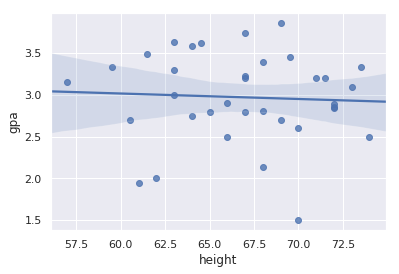

In [17]:
ax = sns.regplot(x='height', y='gpa', data=my_data_3)
plt.show()

From the p-value of the predictor `height` that is `0.761` we can understand that it is not enough to reject the null hypothesis $H_0$.<br/>
Let's look at the F test:

In [18]:
aov_table_3 = sm.stats.anova_lm(fitted_3, typ=2)
aov_table_3

,sum_sq,df,F,PR(>F)
height,0.028,1.000,0.094,0.761
Residual,9.706,33.000,nan,nan


Let's look the matter from the point of view of the sum of squares. <br/>
Let's remember the definitions given above: 
<ul>
  <li>Sum of Squares of the Residuals SSR: tells us how far is the regression to the no relationship line</li>
  <li>Error Sum of Squares ESS: tells us how far the data points are far from the estimated regression line</li>
  <li>Total Sum of Squares SST: tells us how much the data points vary on the x axis (so not considering the y axis - latitude) </li>

In [19]:
SSE = fitted_3.ssr
SSR = fitted_3.ess
SSE, SSR

(9.70550739662786, 0.02758974622928001)

In [20]:
calc = pd.DataFrame()

avgHeight = my_data_3['gpa'].mean()
y_bar = [avgHeight for n in range(my_data_3.shape[0])]
y_hat = fitted_3.predict(my_data_3['height'])


SSR = (y_hat - y_bar) ** 2

calc['y_hat'] = y_hat
calc['y_bar'] = y_i
calc['SSR'] = SSR

sum(calc['SSR']), fitted_3.ess

NameError: ignored

Why do we care about Sum of Squares? Because it tells us about the null hypothesis and the alternative hypothesis.<br/>
We defined SSR (sum of squares of the regression) that in Python is `fitted.ess` then we have the SSE (sum of squares of the error) that in Python is `fitted.ssr`. SSR tells us how much variation there is between the SS of the predicted values($\hat{y}$) and average output ($\bar{y}$) while the SSE tells us how much the variation is due to a random error. Therefore is SSR is big enough then SSE we can say that there is a linear relationship. <br/>
How can we quantify this big enough? We can consider other 2 quantities taking into consideration the degrees of freedom. We do:<br/>
<p>$MSR = \frac{SSR}{1}$ <br/>
<p>$MSE = \frac{SSE}{n-2}$<br/>
<p>$F^* = \frac{MSR}{MSE}$<br/>
  If F is big enough we can be sure that there is a linear relationship.<br/>
  
  To add more theory we need to consider that if we tkae many random samples of size n from some population, and estimate the regression line determining MSR and MSE for each dataset the average MSRs will be :<br/>
  
 $E(MSR) = \sigma^2 + \beta_1^2 \sum_{i=1}^n (X_i - \bar{X})^2 $ <br/>
  
  Similarly we have : <br/>
  
  $E(MSE) = \sigma^2$ (*population variance*)<br/>

In [23]:
SSR = fitted.ess
SSE = fitted.ssr
n = my_data.shape[0]
# it seems stupid to write 1 but it is my way to remember that I am 
# estimating one parameter only
MSR = SSR / 1 
MSE = SSE / (n-2) # there are 2 parameters that have been estimated
F = MSR / MSE
n, SSR, SSE, MSR, MSE, F

(49,
 36464.20020300049,
 17173.065103121953,
 36464.20020300049,
 365.38436389621177,
 99.79682713888168)

In [22]:
aov_table

,sum_sq,df,F,PR(>F)
Lat,36464.200,1.000,99.797,0.000
Residual,17173.065,47.000,nan,nan


Looking at the table above the meaning of the P-value PR(>F) is:<br>
*What is the probability that we'd get an $F^*$ statistic as large as we did, if the null hyphothesis ($H_0: \beta_1 = 0$) is true?*

In [26]:
mens200m = 'https://raw.githubusercontent.com/ellenne/Regression/master/05.%20In/mens200m.csv'
my_data_4 = pd.read_csv(mens200m)
my_data_4.head()

,Year,Men200m
0,1900,22.200
1,1904,21.600
2,1908,22.600
3,1912,21.700
4,1920,22.000


In [28]:
model_4 = smf.ols(formula = 'Men200m ~ Year', data=my_data_4)
fitted_4 = model_4.fit()
print(fitted_4.summary())

                            OLS Regression Results                            
Dep. Variable:                Men200m   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     177.7
Date:                Mon, 06 May 2019   Prob (F-statistic):           2.07e-11
Time:                        16:09:49   Log-Likelihood:                -3.5436
No. Observations:                  22   AIC:                             11.09
Df Residuals:                      20   BIC:                             13.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     76.1534      4.152     18.340      0.0

In [0]:
def BuildModel (my_data, form):
  y_var = form.split("~")[0]
  x_var = form.split("~")[1]
  model = smf.ols(formula = form, data=my_data)
  fitted = model.fit()
  aov_table = sm.stats.anova_lm(fitted, typ=2)
  print(fitted.summary())
  print(aov_table)
  ax = sns.regplot(x='height', y='gpa', data=my_data_3)
  plt.show()
  
  return model, fitted, aov_table
  

                            OLS Regression Results                            
Dep. Variable:                   Year   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     177.7
Date:                Mon, 06 May 2019   Prob (F-statistic):           2.07e-11
Time:                        16:17:53   Log-Likelihood:                -80.734
No. Observations:                  22   AIC:                             165.5
Df Residuals:                      20   BIC:                             167.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2608.8844     49.470     52.737      0.0

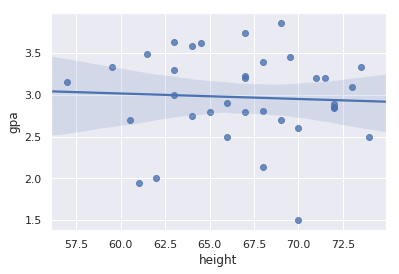

In [35]:
model_4, fitted_4, aov_table_4 = BuildModel(my_data_4, 'Year~Men200m')